In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [48]:
df = pd.read_csv("singindex_biotech_data.csv", index_col=0, encoding= 'unicode_escape').iloc[6:]
metadf = pd.read_csv("singindex_biotech_metadata.csv", encoding= 'unicode_escape')

In [49]:
df.describe()

,Number of R&D firms active in biotechnology (USA),Number of R&D firms active in biotechnology (France),Number of biotech firms active (Germany),Number of biotech firms active (Spain),Total U.S. pharmaceutical and biotech revenues for products 5 years after launch from 2007 to 2019 (in billion U.S. dollars),Production value of the biotech industry in Spain (millions euros),Production value of the biotechnology industry as a share of GDP in Spain from 2010 to 2018 (percentage),Value of the NASDAQ biotech Index (2000-2018),Market size of the biotechnology in the UK in £ million (visual estimation on chart),Number of businesses in global biotechnology over time (visual esstimation on chart),...,Estimated manufacturing capacity for products based on manmmalian-cell culture (1000L) (visual estimation on chart),Total number of Human Genomes sequenced (visual estimation on chart - log),DNA sequencing amount (Kilobases per day per machine) (visaul estimation on chart - log),Cost per base of the dna sequencing (USD) (visual estimation),Cost per base of the dna short oligo (USD)(visual estimation),Cost per base of the gene synthesis (USD)(visual estimation),Number of published articles regarding biomedical engineering in Turkey (Scopus) (visual estimation on chart),Number of publications with biofilms in the title of the articles (google scholar) (visual estimation on chart),Number of mentions of high-throughput dna sequencing (google scholar),Bionedical Engineering Employment (2000-2009) (visual estimation)
count,5.00000,11.000000,13.000000,9.000000,13.000000,9.000000,9.000000,6.000000,10.000000,10.000000,...,6.000000,6.000000,2.000000,2.000000,2.000000,5.000000,18.000000,14.000000,12.000000,9.000000
mean,2579.00000,1764.272727,685.000000,2423.888889,16.215385,7897.777778,0.722222,2412.333333,10530.000000,7720.000000,...,5483.166667,1.942202,5.451545,0.030250,0.090000,1.640000,252.222222,671.428571,34640.833333,11067.777778
std,586.55264,315.040344,78.459119,735.289304,9.407607,1326.933191,0.083333,1216.996412,1978.804353,676.264248,...,804.538729,1.667496,0.775633,0.042073,0.014142,2.452142,130.059061,260.734381,18809.562587,3698.965321
min,1772.00000,1068.000000,551.000000,1181.000000,4.300000,6225.000000,0.600000,790.000000,8200.000000,6900.000000,...,4400.000000,0.477121,4.903090,0.000500,0.080000,0.300000,65.000000,260.000000,7290.000000,6800.000000
25%,2470.00000,1634.500000,645.000000,1715.000000,9.700000,7038.000000,0.700000,1420.750000,8975.000000,7125.000000,...,4874.500000,0.607841,5.177317,0.015375,0.085000,0.400000,153.750000,520.000000,17725.000000,7000.000000
50%,2562.00000,1882.000000,693.000000,2767.000000,13.300000,7664.000000,0.700000,2908.500000,10050.000000,7700.000000,...,5606.000000,1.500000,5.451545,0.030250,0.090000,0.500000,240.000000,745.000000,36250.000000,11500.000000
75%,2673.00000,1977.500000,726.000000,2981.000000,24.900000,8787.000000,0.800000,3278.750000,11925.000000,8150.000000,...,6093.750000,2.750000,5.725772,0.045125,0.095000,1.000000,320.000000,847.500000,50225.000000,14760.000000
max,3418.00000,2083.000000,820.000000,3070.000000,32.300000,9861.000000,0.800000,3540.000000,13900.000000,8800.000000,...,6400.000000,4.698970,6.000000,0.060000,0.100000,6.000000,480.000000,1000.000000,57800.000000,15000.000000


## Pre-processing

### Build index components

In [50]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [51]:
df[index_comps].to_csv("singindex_biotech_raw_components.csv")
df_index.to_csv("singindex_biotech_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_biotech_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [52]:
from scipy import interpolate

In [59]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=2)

<AxesSubplot:xlabel='Years'>

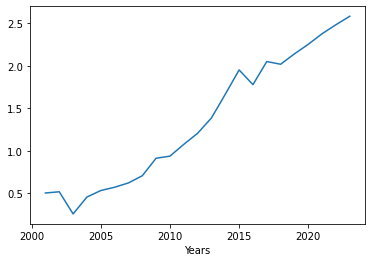

In [60]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [61]:
s_model = interpolate.interp1d(singindex_historic.index, singindex_historic.values, fill_value="extrapolate")

<AxesSubplot:>

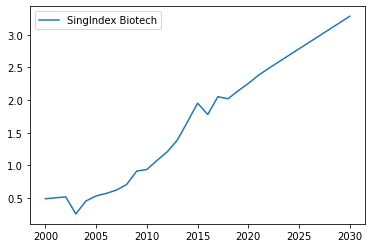

In [64]:
singindex = pd.DataFrame({"SingIndex Biotech": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [65]:
singindex

,SingIndex Biotech
2000,0.491607
2001,0.505787
2002,0.519967
2003,0.259461
2004,0.457763
2005,0.534407
2006,0.573204
2007,0.623942
2008,0.708346
2009,0.914442


### Export

In [66]:
df_interp_index.to_csv("singindex_biotech_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_biotech_avg_interpolate.csv")
singindex.to_csv("singindex_biotech_avg_extrapolate_2000_2030.csv")